In [10]:
import pandas as pd

import numpy as np

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [13]:
df = pd.read_csv('c:/users/sarah/downloads/vgsales.csv')

In [14]:
df_clean = df.dropna(subset=['Year', 'Publisher'])

In [15]:
df_clean.loc[:, 'Year'] = df_clean['Year'].astype(int)

In [16]:
#Drop unnecessary columns
df_clean = df_clean.drop(columns=['Rank', 'Name'])

In [17]:
#Encode categorical variables using LabelEncoder
label_encoders = {}
for col in ['Platform', 'Genre', 'Publisher']:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le  # Store encoders for future use (like decoding)

In [18]:
print(df_clean.head())

   Platform    Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
0        26  2006.0     10        359     41.49     29.02      3.77   
1        11  1985.0      4        359     29.08      3.58      6.81   
2        26  2008.0      6        359     15.85     12.88      3.79   
3        26  2009.0     10        359     15.75     11.01      3.28   
4         5  1996.0      7        359     11.27      8.89     10.22   

   Other_Sales  Global_Sales  
0         8.46         82.74  
1         0.77         40.24  
2         3.31         35.82  
3         2.96         33.00  
4         1.00         31.37  


In [26]:
#  Basic information
print("Shape of dataset:", df_clean.shape)
print("\nData Types:\n", df_clean.dtypes)
print("\nMissing values:\n", df_clean.isnull().sum())


Shape of dataset: (16291, 9)

Data Types:
 Platform          int32
Year            float64
Genre             int32
Publisher         int32
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Missing values:
 Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [28]:
print("\nStatistical Summary:\n", df_clean.describe())


Statistical Summary:
            Platform          Year         Genre     Publisher      NA_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean      15.812841   2006.405561      4.928611    291.983365      0.265647   
std        8.369998      5.832412      3.762844    176.642066      0.822432   
min        0.000000   1980.000000      0.000000      0.000000      0.000000   
25%        7.000000   2003.000000      1.000000    137.000000      0.000000   
50%       16.000000   2007.000000      5.000000    323.000000      0.080000   
75%       21.000000   2010.000000      8.000000    455.000000      0.240000   
max       30.000000   2020.000000     11.000000    575.000000     41.490000   

           EU_Sales      JP_Sales   Other_Sales  Global_Sales  
count  16291.000000  16291.000000  16291.000000  16291.000000  
mean       0.147731      0.078833      0.048426      0.540910  
std        0.509303      0.311879      0.190083      1.567345  
min      

In [32]:
print("\nGlobal Sales Distribution:\n", df_clean['Global_Sales'].describe())


Global Sales Distribution:
 count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64


In [34]:
correlation_matrix = df_clean.corr()
print("\nCorrelation Matrix:\n", correlation_matrix['Global_Sales'].sort_values(ascending=False))


Correlation Matrix:
 Global_Sales    1.000000
NA_Sales        0.941269
EU_Sales        0.903264
Other_Sales     0.747964
JP_Sales        0.612774
Platform        0.027929
Genre           0.022215
Publisher       0.019368
Year           -0.074647
Name: Global_Sales, dtype: float64


In [36]:
print("\nTop 5 Platforms (encoded numbers):\n", df_clean['Platform'].value_counts().head())


Top 5 Platforms (encoded numbers):
 Platform
4     2131
16    2127
17    1304
26    1290
28    1234
Name: count, dtype: int64


In [38]:
print("\nTop 5 Genres (encoded numbers):\n", df_clean['Genre'].value_counts().head())


Top 5 Genres (encoded numbers):
 Genre
0     3251
10    2304
3     1686
7     1470
8     1282
Name: count, dtype: int64


In [40]:
print("\nTop 5 Publishers (encoded numbers):\n", df_clean['Publisher'].value_counts().head())


Top 5 Publishers (encoded numbers):
 Publisher
138    1339
21      966
347     928
524     918
275     823
Name: count, dtype: int64


In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

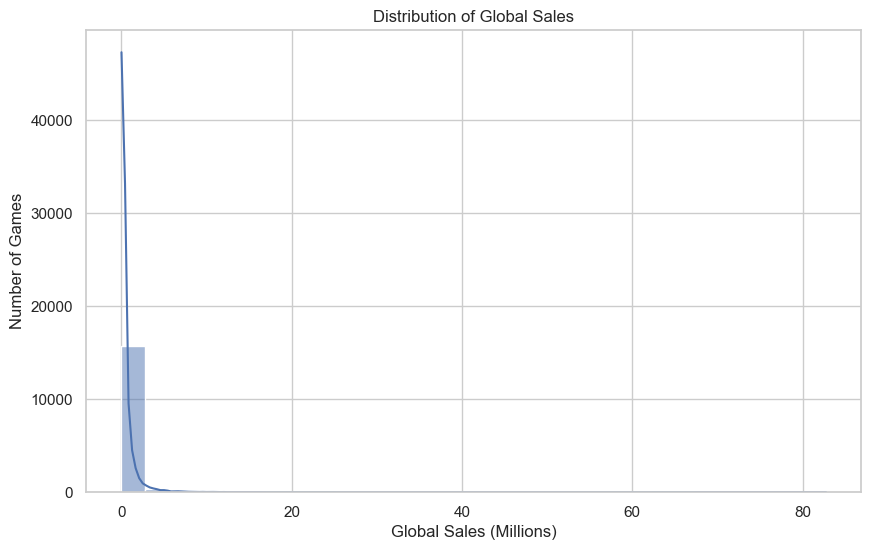

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(df_clean['Global_Sales'], bins=30, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Number of Games')
plt.show()

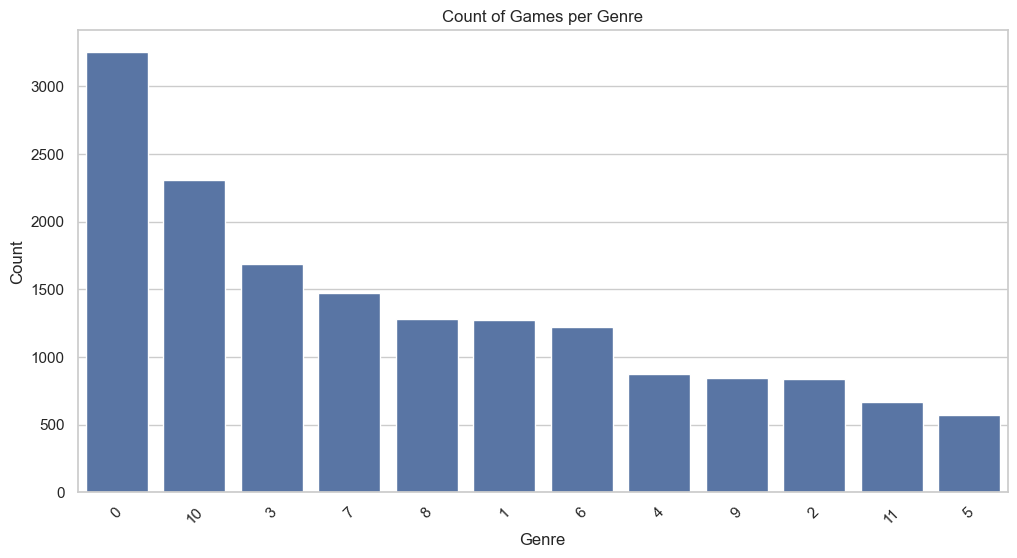

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x='Genre', data=df_clean, order=df_clean['Genre'].value_counts().index)
plt.title('Count of Games per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

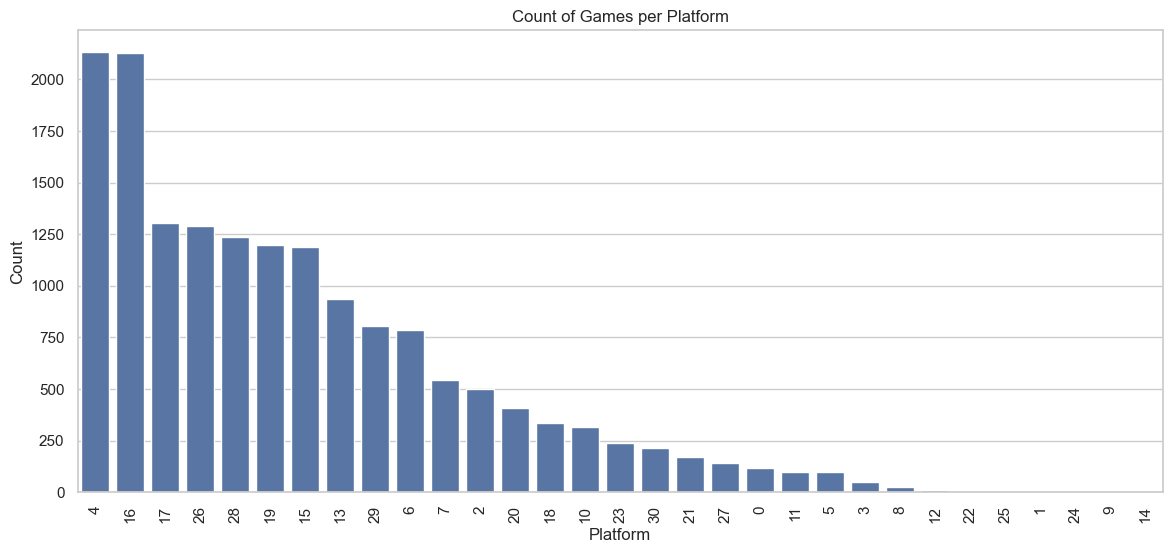

In [48]:
plt.figure(figsize=(14,6))
sns.countplot(x='Platform', data=df_clean, order=df_clean['Platform'].value_counts().index)
plt.title('Count of Games per Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

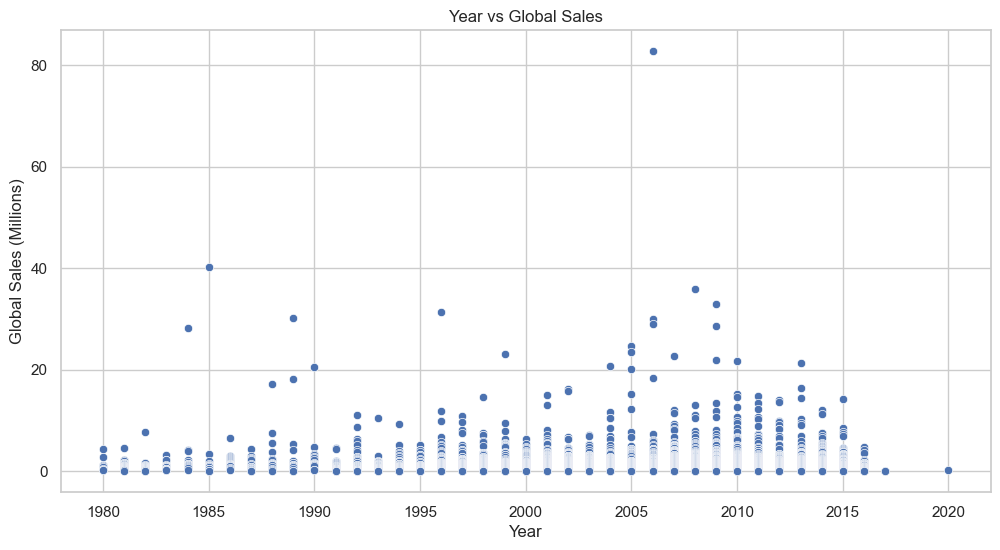

In [50]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Year', y='Global_Sales', data=df_clean)
plt.title('Year vs Global Sales')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.show()

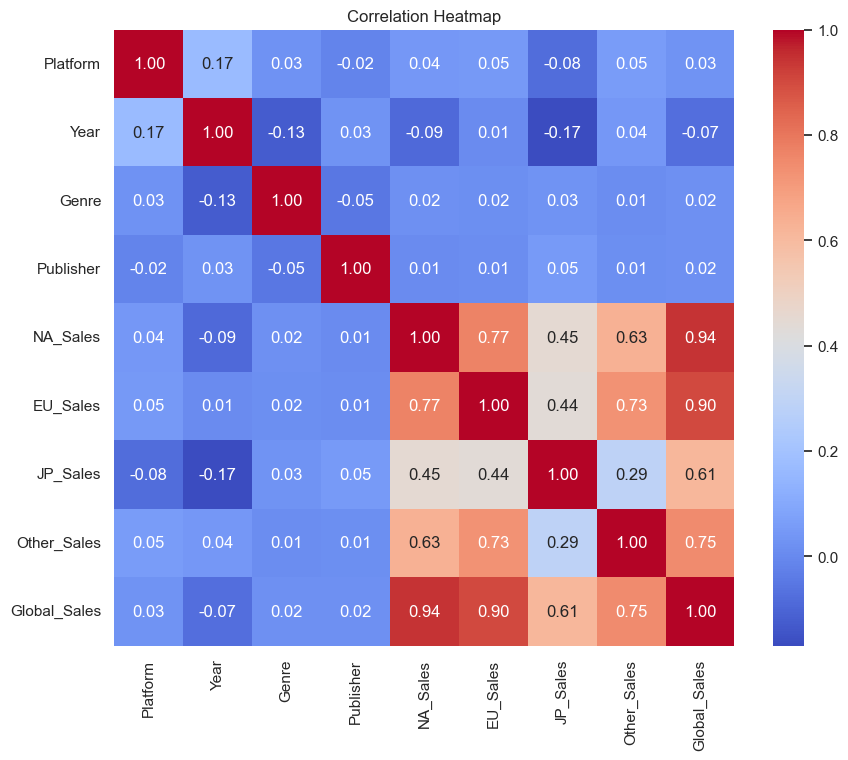

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

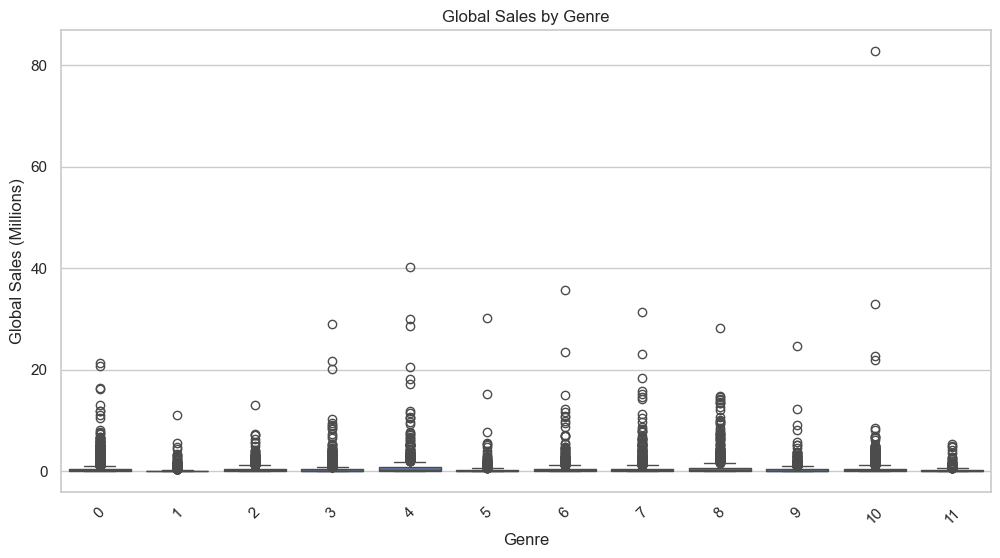

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Genre', y='Global_Sales', data=df_clean)
plt.title('Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.show()

In [62]:
X = df_clean.drop(columns=['Global_Sales'])
y = df_clean['Global_Sales']

In [64]:
#to split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#training the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [68]:
#to train random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
#make predictions.
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [72]:
print("Linear Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred_lr, squared=False))

Linear Regression Results:
R2 Score: 0.999993294968631
Root Mean Squared Error: 0.005355735986943926


C:\Users\sarah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [78]:
print("\nRandom Forest Regressor Results:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred_rf, squared=False))


Random Forest Regressor Results:
R2 Score: 0.82313869852597
Root Mean Squared Error: 0.8698315607019796


C:\Users\sarah\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
